In [136]:
import torch
import torch.nn as nn
from torch.hub import load_state_dict_from_url
from typing import Type, Any, Callable, Union, List, Dict, Optional, cast
from torch import Tensor
from collections import OrderedDict 
from torchvision.models.resnet import model_urls
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import torchvision

In [2]:
from torchvision.models.resnet import *
from torchvision.models.resnet import BasicBlock, Bottleneck

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [4]:
class IntResNet(ResNet):
    def __init__(self,output_layer,*args):
        self.output_layer = output_layer
        super().__init__(*args)
        
        self._layers = []
        for l in list(self._modules.keys()):
            self._layers.append(l)
            if l == output_layer:
                break
        self.layers = OrderedDict(zip(self._layers,[getattr(self,l) for l in self._layers]))

    def _forward_impl(self, x):
        for l in self._layers:
            x = self.layers[l](x)

        return x

    def forward(self, x):
        return self._forward_impl(x)

In [5]:
def new_resnet(
    arch: str,
    outlayer: str,
    block: Type[Union[BasicBlock, Bottleneck]],
    layers: List[int],
    pretrained: bool,
    progress: bool,
    **kwargs: Any
) -> IntResNet:

    '''model_urls = {
        'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
        'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
        'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
        'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
        'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
        'resnext50_32x4d': 'https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth',
        'resnext101_32x8d': 'https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth',
        'wide_resnet50_2': 'https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth',
        'wide_resnet101_2': 'https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth',
    }'''

    model = IntResNet(outlayer, block, layers, **kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(model_urls[arch],
                                              progress=progress)
        model.load_state_dict(state_dict)
    return model

In [6]:
model = new_resnet('resnet50','layer4',Bottleneck, [3, 4, 6, 3],True,True)
model = model.to(device)

In [7]:
from torchsummary import summary
summary(model,input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

## Test Model


In [8]:
x = cv2.imread('cat.jpg')
x = cv2.resize(x, (224,224))
x= x.transpose(2,0,1).astype(np.float32)[None]

out = model(torch.tensor(x))
out = out.cpu().data.numpy()

print(out.shape)


'''
# Plot Feature Maps

fig, plt1 = plt.subplots(32, 64, sharey=True, figsize=(50, 25))


idx, x1, y1= 0, 0, 0
for x1 in range(32):
    for y1 in range(64):
        plt1[x1, y1].imshow(out[0,idx,:,:])
        idx+=1

        if idx % 100 == 0:
            print(idx)


fig.show()
'''
cat = out.reshape(1, 100352)
print(cat.shape)

(1, 2048, 7, 7)
(1, 100352)


In [9]:
x = cv2.imread('dog.jpg')
x = cv2.resize(x, (224,224))
x= x.transpose(2,0,1).astype(np.float32)[None]

out = model(torch.tensor(x))
out = out.cpu().data.numpy()

print(out.shape)

dog = out.reshape(1, 100352)
print(dog.shape)

(1, 2048, 7, 7)
(1, 100352)


In [10]:
x = cv2.imread('cat2.jpg')
x = cv2.resize(x, (224,224))
x= x.transpose(2,0,1).astype(np.float32)[None]

out = model(torch.tensor(x))
out = out.cpu().data.numpy()

print(out.shape)

cat2 = out.reshape(1, 100352)
print(cat2.shape)

(1, 2048, 7, 7)
(1, 100352)


In [11]:
x = cv2.imread('cat3.jpg')
x = cv2.resize(x, (224,224))
x= x.transpose(2,0,1).astype(np.float32)[None]

out = model(torch.tensor(x))
out = out.cpu().data.numpy()

print(out.shape)

cat3 = out.reshape(1, 100352)
print(cat3.shape)

(1, 2048, 7, 7)
(1, 100352)


In [12]:
x = cv2.imread('dog2.jpg')
x = cv2.resize(x, (224,224))
x= x.transpose(2,0,1).astype(np.float32)[None]

out = model(torch.tensor(x))
out = out.cpu().data.numpy()

print(out.shape)

dog2 = out.reshape(1, 100352)
print(dog2.shape)

(1, 2048, 7, 7)
(1, 100352)


## Eucledian Distance


In [13]:
from sklearn.metrics import pairwise_distances

pairwise_dist_dog = pairwise_distances(cat2, dog)
pairwise_dist_dog2 = pairwise_distances(cat2, dog2)
pairwise_dist_cat2 = pairwise_distances(cat2, cat3)
pairwise_dist_cat = pairwise_distances(cat2, cat)

print("cat1", pairwise_dist_cat.flatten())
print("cat2", pairwise_dist_cat2.flatten())

print("dog1", pairwise_dist_dog.flatten())
print("dog2", pairwise_dist_dog2.flatten())




cat1 [276.5846]
cat2 [270.4365]
dog1 [286.53528]
dog2 [277.9297]


## Custom Dataset


In [42]:
metaID = []
metaPath = []

for root, dirs, filenames in os.walk('gallery_data'):
    for filename in filenames:
        first, last = os.path.splitext(filename)
        if last != '.PNG' or not first.isdigit():
            continue
        
        path = os.path.join(root, filename)

        metaID.append(first)
        metaPath.append(path)    

#print(metaID)
#print(metaPath)

dataset = list(zip(metaID, metaPath))
print(dataset)

[('1', 'gallery_data\\dankook\\1.PNG'), ('10', 'gallery_data\\dankook\\10.PNG'), ('2', 'gallery_data\\dankook\\2.PNG'), ('3', 'gallery_data\\dankook\\3.PNG'), ('4', 'gallery_data\\dankook\\4.PNG'), ('5', 'gallery_data\\dankook\\5.PNG'), ('6', 'gallery_data\\dankook\\6.PNG'), ('7', 'gallery_data\\dankook\\7.PNG'), ('8', 'gallery_data\\dankook\\8.PNG'), ('9', 'gallery_data\\dankook\\9.PNG'), ('11', 'gallery_data\\dongguk\\11.PNG'), ('12', 'gallery_data\\dongguk\\12.PNG'), ('13', 'gallery_data\\dongguk\\13.PNG'), ('14', 'gallery_data\\dongguk\\14.PNG'), ('15', 'gallery_data\\dongguk\\15.PNG'), ('16', 'gallery_data\\dongguk\\16.PNG'), ('17', 'gallery_data\\dongguk\\17.PNG'), ('18', 'gallery_data\\dongguk\\18.PNG'), ('19', 'gallery_data\\dongguk\\19.PNG'), ('20', 'gallery_data\\dongguk\\20.PNG'), ('21', 'gallery_data\\dongguk_women\\21.PNG'), ('22', 'gallery_data\\dongguk_women\\22.PNG'), ('23', 'gallery_data\\dongguk_women\\23.PNG'), ('24', 'gallery_data\\dongguk_women\\24.PNG'), ('25', 'g

In [58]:
def extract_features(model, dataset):
    feature_list = []
    for (a,b) in dataset:
        img = cv2.imread(b)
        img = cv2.resize(img, (224,224))
        img = img.transpose(2,0,1).astype(np.float32)[None]

        out = model(torch.tensor(img))
        out = out.cpu().data.numpy()
        out = out.reshape(1, 100352)

        feature_list.append((a,out))

    return feature_list
        
feature_list = extract_features(model, dataset)

In [69]:
print(feature_list[0][0])

1


In [157]:
def get_similar_pictures(feature, feature_list, num_results):
    pdists = []

    for i in range(len(feature_list)):
        
        id = feature_list[i][0]
        dist = pairwise_distances(feature_list[i][1], feature.reshape(1,-1)).flatten()

        pdists.append((id, dist))

    pdists = sorted(pdists, key=lambda x: x[1])

    recommendations = pdists[0:num_results]

    return recommendations

## Make Recommendations

In [158]:
def find_feature(img_path):
    img = cv2.imread(img_path)

    img = cv2.resize(img, (224,224))
    img = img.transpose(2,0,1).astype(np.float32)[None]

    out = model(torch.tensor(img))
    out = out.cpu().data.numpy()

    return out

[('34', array([268.22296], dtype=float32)), ('8', array([271.29294], dtype=float32)), ('47', array([272.61487], dtype=float32)), ('35', array([272.67883], dtype=float32)), ('46', array([273.07068], dtype=float32))]
ID =  34
Eucledian Distance =  [268.22296]


C:\Users\HUSTAR25\AppData\Local\Temp\ipykernel_15484\3021540593.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pp = np.array(recommendations)[:,0]


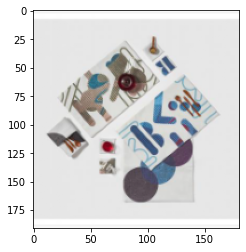

ID =  8
Eucledian Distance =  [271.29294]


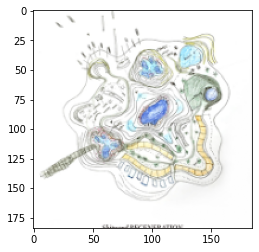

ID =  47
Eucledian Distance =  [272.61487]


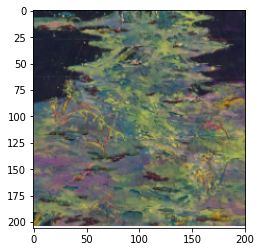

ID =  35
Eucledian Distance =  [272.67883]


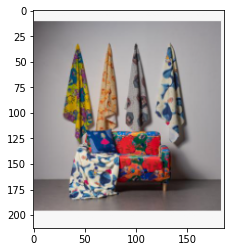

ID =  46
Eucledian Distance =  [273.07068]


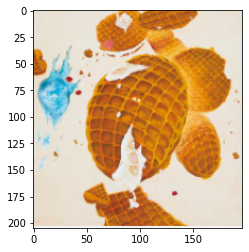

In [184]:
input = find_feature("C:\\Users\\HUSTAR25\\Desktop\\mobile_project\\test_img4.jpg")

recommendations = get_similar_pictures(input, feature_list, 5)
print(recommendations)

pp = np.array(recommendations)[:,0]

for (id, dist) in recommendations:
    for (a,b) in dataset:
        if a == id:
            print("ID = ", a)
            print("Eucledian Distance = ", dist)
            img = torchvision.io.read_image(b)
            img = img.type(torch.float32)

            plt.imshow(img.permute(1,2,0) / 255)
            plt.show()
       

In [51]:
print(feature_list[0].shape)

(1, 100352)
